Problem 1:

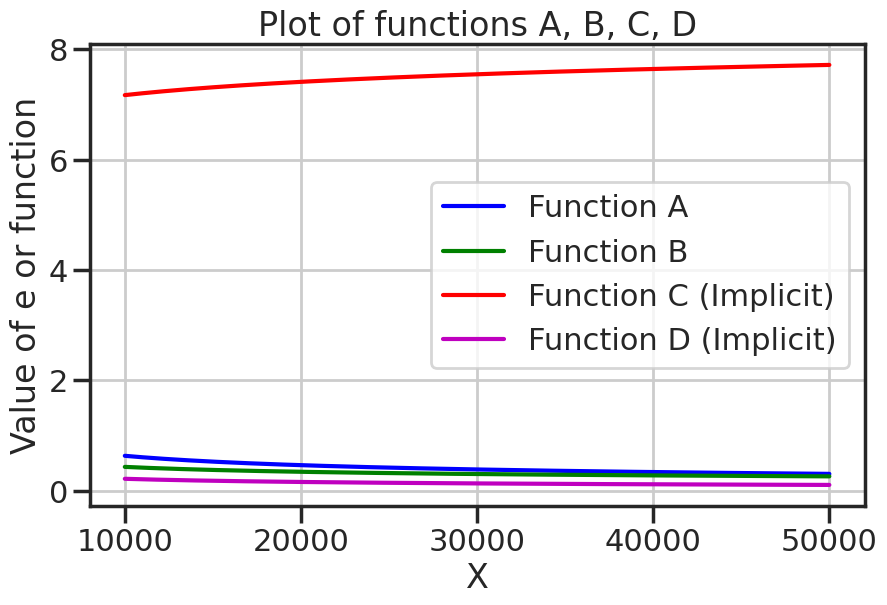

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sympy import symbols, Eq, solve, log

sns.set_context('poster')
sns.set_style('ticks')

d_vc = 50
delta = 0.05
N = 10

def func_a(X):
    return (8 * math.log(4 * (2*X)**d_vc / delta) / X)**0.5

def func_b(X):
    return (2 * math.log(2*X * (X)**d_vc) / X)**0.5 + (2 * math.log(1/delta) / X)**0.5 + 1/N

X_sym, e = symbols('X e')
fun_c = Eq(e, ((2*e + log(6*(2*X_sym)**d_vc / delta)) / N)**0.5)
fun_d = Eq(e, ((4*e + 4*e**2 + log(4*(X_sym**2)**d_vc / delta)) / (2*X_sym))**0.5)

X_vals = np.linspace(10000, 50000, 200)
e_vals_func_c = []
e_vals_func_d = []

for X_val in X_vals:
    e_val_c = solve(fun_c.subs(X_sym, X_val), e)
    e_val_d = solve(fun_d.subs(X_sym, X_val), e)

    e_vals_func_c.append(max([sol.evalf() for sol in e_val_c if sol.is_real]))
    e_vals_func_d.append(max([sol.evalf() for sol in e_val_d if sol.is_real]))

plt.figure(figsize=(10, 6))

plt.plot(X_vals, [func_a(X) for X in X_vals], label='Function A', color='b')
plt.plot(X_vals, [func_b(X) for X in X_vals], label='Function B', color='g')

plt.plot(X_vals, e_vals_func_c, label='Function C (Implicit)', color='r')
plt.plot(X_vals, e_vals_func_d, label='Function D (Implicit)', color='m')

plt.xlabel('X')
plt.ylabel('Value of e or function')
plt.title('Plot of functions A, B, C, D')
plt.legend()
plt.grid(True)
plt.show()


Problem 4:

In [ ]:


def target(x):
  return math.sin(math.pi*x)


def generate_training(slopes):
  X = np.random.uniform(-1.0, 1.0, 2)
  Y = np.array([target(point) for point in X])
  slope = ((X[0] * Y[0]) + (X[1] * Y[1])) / (X[0]**2 + X[1]**2)
  slopes.append(slope)
  return slope

total = 0
N = 1000
slopes = []
for _ in range(N):
  total += generate_training(slopes)

print(total/N)

1.4150017603705412


Problem 5:

In [ ]:
slope = total / N
bias = 0
for _ in range(N):
  x = np.random.uniform(-1.0, 1.0)
  y = target(x)
  bias += (slope * x - y)**2

print(bias/N)

0.2634637811452557


Problem 6:

In [ ]:
variance = 0
for hypothesis in slopes:
   x = np.random.uniform(-1.0, 1.0)
   variance += (hypothesis*x - slope*x)**2

print(variance / N)


0.2371159516726178


Problem 7:

In [ ]:
first_b = 0
option_a = []

second_a = 0
option_b = []

third_a = 0
third_b = 0
option_c = []

fourth_a = 0
option_d = []

fifth_a = 0
fifth_b = 0
option_e = []

for _ in range(N):
  X = np.random.uniform(-1.0, 1.0, 2)
  Y = np.array([target(point) for point in X])
  slope1 = (Y[0] + Y[1])/2
  first_b += slope1
  option_a.append(slope1)
  slope2 = ((X[0] * Y[0]) + (X[1] * Y[1])) / (X[0]**2 + X[1]**2)
  second_a += slope2
  option_b.append(slope2)
  slope3a = (Y[0] - Y[1]) / (X[0] - X[1])
  third_a += slope3a
  slope3b = X[0]*Y[1] - X[1]*Y[0]
  third_b += slope3b
  option_c.append([slope3a, slope3b])
  slope4 = (Y[0]*X[0]**2 + Y[1]*X[1]**2) / (X[0]**4 + X[1]**4)
  fourth_a += slope4
  option_d.append(slope4)
  slope5a = (Y[0] - Y[1]) / (X[0]**2 - X[1]**2)
  fifth_a += slope5a
  slope5b = (Y[1]*X[0]**2 - Y[0]*X[1]**2) / (X[0]**2 - X[1]**2)
  fifth_b += slope
  option_e.append([slope5a, slope5b])

first_b /= N
second_a /= N
third_a /= N
third_b /= N
fourth_a /= N
fifth_a /= N
fifth_b /= N


a_error = 0
b_error = 0
c_error = 0
d_error = 0
e_error = 0

for i in range(N):
  x = np.random.uniform(-1.0, 1.0)
  y = target(x)
  a_error += (y - option_a[i])**2 + (first_b - option_a[i])**2
  b_error += (y - option_b[i]*x)**2 + (second_a*x - option_b[i]*x)**2
  c_error += (y - option_c[i][0]*x - option_c[i][1])**2 + (third_a*x + third_b - (option_c[i][0]*x + option_c[i][1]))**2
  d_error += (y - option_d[i]*x**2)**2 + (fourth_a*x**2 - option_d[i]*x**2)**2
  e_error += (y - option_e[i][0]*x**2 - option_e[i][1])**2 + (fifth_a*x**2 + fifth_b - (option_e[i][0]*x**2 + option_e[i][1]))**2

print("A error: ", a_error / N)
print("B error: ", b_error / N)
print("C error: ", c_error / N)
print("D error: ", d_error / N)
print("E error: ", e_error / N)

A error:  1.070606457960489
B error:  0.6968755932433993
C error:  2.0514767813221
D error:  21.202840836703643
E error:  14113.000301250535
